<a href="https://colab.research.google.com/github/HumbertoMezaRuiz/FisicaComputacional1/blob/main/Actividad10/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

# **Ejercicio 1**


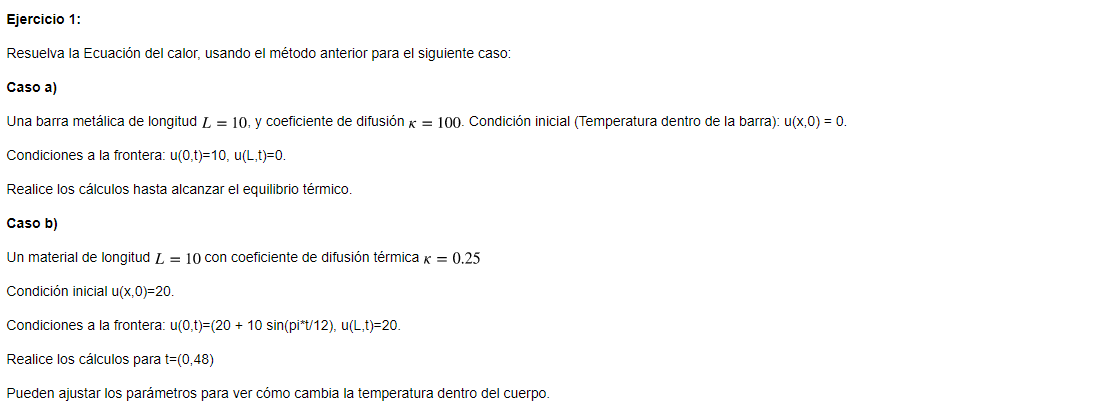

dt/dx**2 < 0.5? 0.004


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'


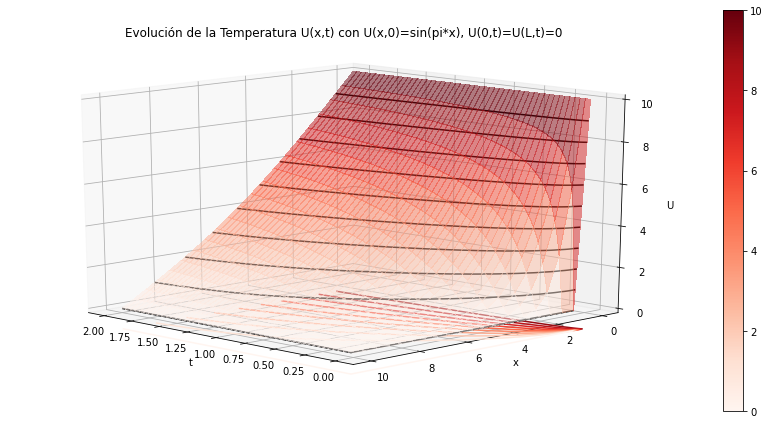

In [11]:
# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 2001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 2.0 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 10.0 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
U[:,0] = np.zeros(xspan.shape)
# Condiciones a la Frontera tipo Dirichlet
U[0, :] = 10
U[-1, :] = 0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=sin(pi*x), U(0,t)=U(L,t)=0')

# Punto del observador 
ax.view_init(elev=15, azim=135)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 0.0256


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'lw'


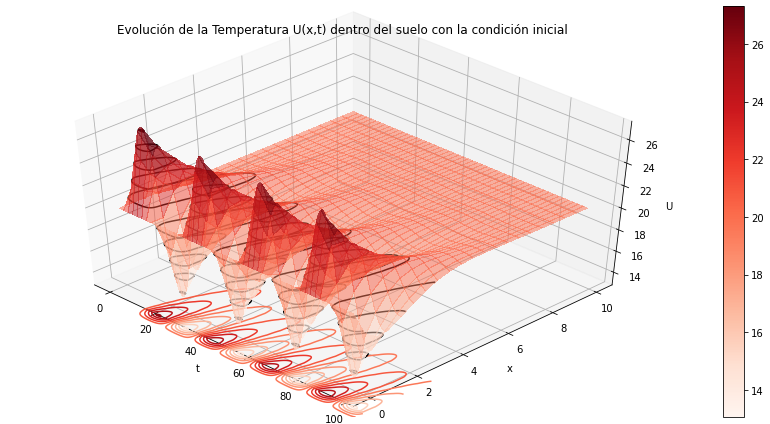

In [12]:
# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 15001 # Número de puntos en el tiempo

x0 = 0
xL = 10 # Longitud de la barra

t0 = 0
tF = 96 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 0.25 # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
# La temperatura inicial es de 20ºC dentro de la tierra
U[:,0] = 20.0*np.ones(xspan.shape)

# Condiciones a la Frontera tipo Dirichlet
#U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
#U[-1, :] = 20.0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 20 + 10*np.sin(np.pi*t/12.0)
    U[-1, :] = 20.0
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

# Punto del observador 
ax.view_init(elev=45, azim=-45)


plt.tight_layout()
plt.show()

# **Ejercicio 2**

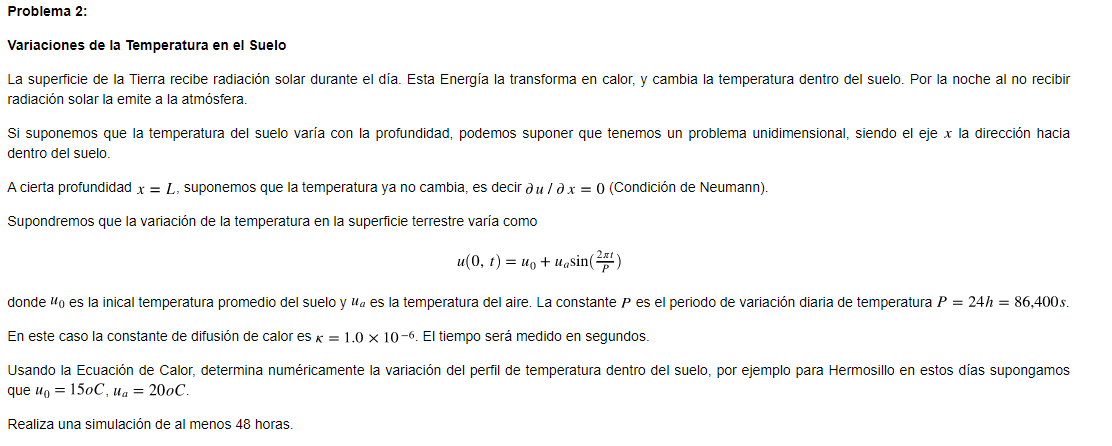

dt/dx**2 < 0.5? 0.1152


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'lw'


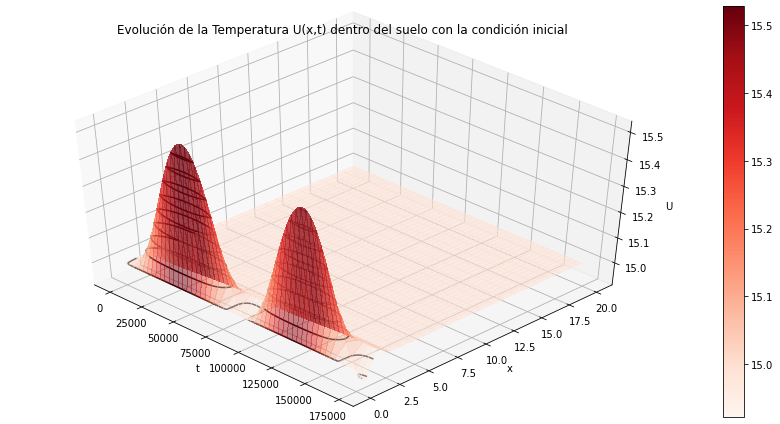

In [21]:
# Hay que jugar con los puntos por la restricción de estabilidad y convergencia
M = 21 # Número de puntos en el eje x
N = 1500001 # Número de puntos en el tiempo

x0 = 0
xL = 20 # Profundidad a la que T no cambia

t0 = 0
tF = 86400*2 # Tiempo final

dx = (xL - x0) / (M - 1) # tamaño discretización en x
dt = (tF - t0) / (N - 1) # tamaño de la dicretización en t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1.0*10**(-6) # difusividad térmica

alpha = kappa * dt / dx**2 # Coeficiente en la Ecuación

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

# Define el tamaño de la matrix de la solución y la inicia con ceros
U = np.zeros((M, N))

# Condición inicial
#U[:, 0] = np.sin(np.pi*xspan)
# La temperatura inicial es de 20ºC dentro de la tierra
U[:,0] = 15.0*np.ones(xspan.shape)

# Condiciones a la Frontera tipo Dirichlet
#U[0, :] = 15 + 20*np.sin(np.pi*t/12.0)
#U[-1, :] = 15.0

# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400.0)
    U[-1, :] = 15.0
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

# Punto del observador 
ax.view_init(elev=45, azim=-45)


plt.tight_layout()
plt.show()